In [1]:
# 坑爹了，书中没有讲何如构造数据集，自己来吧

# 三维数据集
# 100个点
# x 随机树 range 2 - 12
# y 随机数 range 2 - 12
# z 均值为2的标准正态分布
# 旋转向量 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

m = 1000
x = np.random.rand(m, 1) * 10 + 2
y = np.random.rand(m, 1) * 10 + 2
z = np.random.randn(m, 1) + 2


# 变成三维 有点low 有没有现成的方法？
X0 = []
for i in range(m):
    ele = []
    ele.append(x[i][0])
    ele.append(y[i][0])
    ele.append(z[i][0])
    X0.append(ele)
X1 = np.array(X0)


# 绘制三维散点图
def lg_plot_3D(data):
    x = data[:, 0]
    y = data[:, 1]
    z = data[:, 2]
    
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    plt.figure()
    plt.show()

# 绘制二维散点图
def lg_plot_2D(data):
    x = data[:, 0]
    y = data[:, 1]

    plt.plot(x, y, ".")
    plt.figure()
    plt.show()

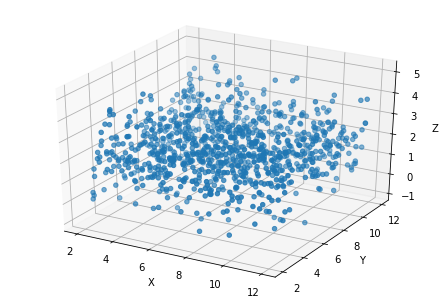

<Figure size 432x288 with 0 Axes>

In [2]:
lg_plot_3D(X1)

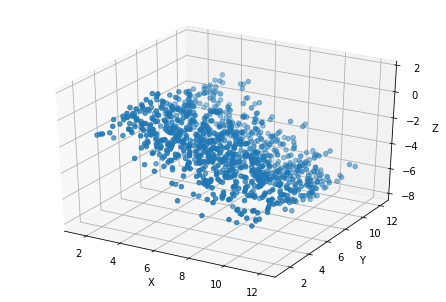

<Figure size 432x288 with 0 Axes>

In [3]:
# 将三维向量旋转
# https://www.cnblogs.com/xtl9/p/5445353.html
thetaX = 15/180*np.pi
thetaY = 30/180*np.pi
thetaZ = 5/180*np.pi
RX = [[1, 0, 0],[0, np.cos(thetaX), -np.sin(thetaX)],[0, np.sin(thetaX), np.cos(thetaX)]]
RY = [[np.cos(thetaY), 0, -np.sin(thetaY)],[0, 1, 0],[np.sin(thetaY), 0, np.cos(thetaY)]]
RZ = [[np.cos(thetaZ), -np.sin(thetaZ), 0],[np.sin(thetaZ), np.cos(thetaZ), 0],[0, 0, 1]]

X = X1.dot(RX).dot(RY).dot(RZ)
lg_plot_3D(X)

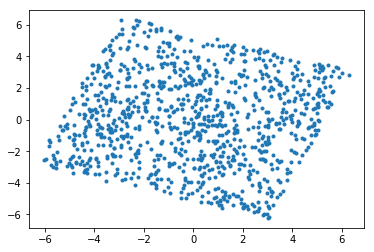

<Figure size 432x288 with 0 Axes>

In [4]:
# 奇异值分解，做主成分分析
X_centered = X - X.mean(axis=0)
U, s, V = np.linalg.svd(X_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

W2 = V.T[:, :2]
X2D = X_centered.dot(W2)
lg_plot_2D(X2D)

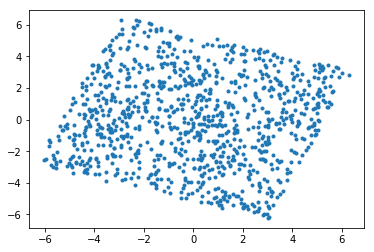

<Figure size 432x288 with 0 Axes>

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
X2D_PCA = pca.transform(X)
lg_plot_2D(X2D_PCA)

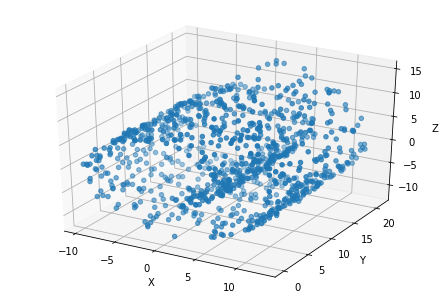

<Figure size 432x288 with 0 Axes>

In [6]:
from sklearn import datasets

swiss_roll = datasets.make_swiss_roll(n_samples=1000, noise=0.2)
Xs = swiss_roll[0]
t = swiss_roll[1]
lg_plot_3D(Xs)

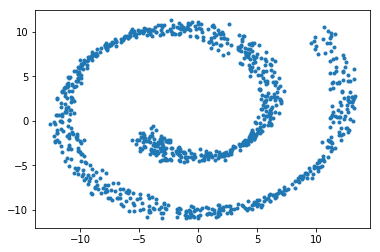

<Figure size 432x288 with 0 Axes>

In [7]:
# 奇异值分解，做主成分分析
Xs_centered = Xs - Xs.mean(axis=0)
U, s, V = np.linalg.svd(Xs_centered)
c1 = V.T[:, 0]
c2 = V.T[:, 1]

W2 = V.T[:, :2]
Xs2D = Xs_centered.dot(W2)
lg_plot_2D(Xs2D)

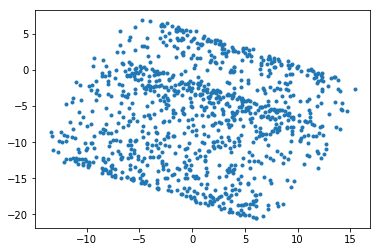

<Figure size 432x288 with 0 Axes>

In [8]:
# 为什么和做SVD分解得到结果有较大差异？
from sklearn.decomposition import PCA

pcas = PCA(n_components=2).fit(Xs)
Xs2D_PCA = pca.transform(Xs)
lg_plot_2D(Xs2D_PCA)

In [9]:
# 方差解释率
print(pca.explained_variance_ratio_)
print(pcas.explained_variance_ratio_)

[0.49431571 0.44868825]
[0.3891905  0.32684284]


In [10]:
# 最佳维度

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

3

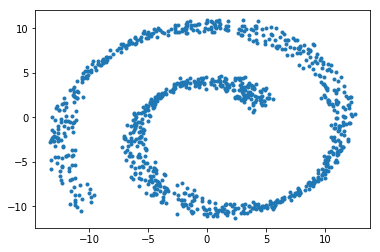

<Figure size 432x288 with 0 Axes>

In [11]:
# 核主成分分析

from sklearn.decomposition import KernelPCA

# linear核
# 相当于直接使用PCA类
linear_pca = KernelPCA(n_components=2, kernel="linear", gamma=0.04)
Xs_reduced = linear_pca.fit_transform(Xs)
lg_plot_2D(Xs_reduced)

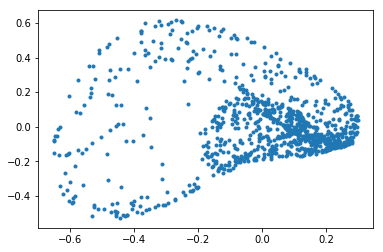

<Figure size 432x288 with 0 Axes>

In [12]:
# RBF核
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
Xs_reduced = rbf_pca.fit_transform(Xs)
lg_plot_2D(Xs_reduced)

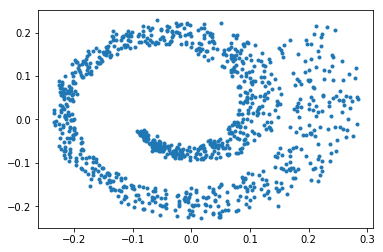

<Figure size 432x288 with 0 Axes>

In [13]:
# sigmoid核
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001)
Xs_reduced = sig_pca.fit_transform(Xs)
lg_plot_2D(Xs_reduced)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(Xs, y) # fuck y是什么？？？

print(grid_search.best_params_)

/Users/davosli/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/davosli/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/davosli/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'